# **深層学習　３日目**

# １．再帰型ニューラルネットワークの概念

◆RNNとは


時系列データ(時間毎に統計的依存関係が認められるようなデータ)に対応可能なニューラルネットワーク

特徴として、過去の状況を保持して、過去を参考にしながら次の時間を予測する

数珠つなぎとなるような再帰的構造である

◆BPTTとは

RNNのパラメータ調整方法のひとつ


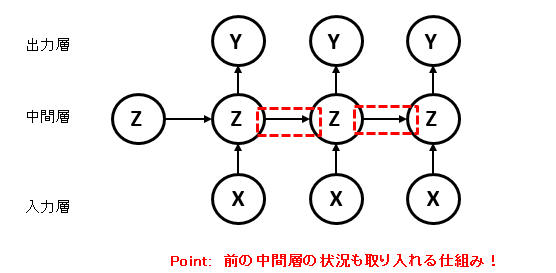

【確認テスト】

（１）RNNの３つの重みについて

　　①現在の中間層に定義するときの重み

　　②中間層から出力を定義するときの重み

　　③？？？？

　解答：前の中間層から現在の中間層への重み

（２）連鎖律の原理を使い、dz/dx　をもとめよ

$$ z=t^2 $$

$$ t=x+y$$ 


解答：

$$ \frac{dz}{dx} =\frac{dz}{dt}\frac{dt}{dx} $$
上記で計算することができる

$$ =2t+1$$

$$ =2(x+y)+1$$



（３）

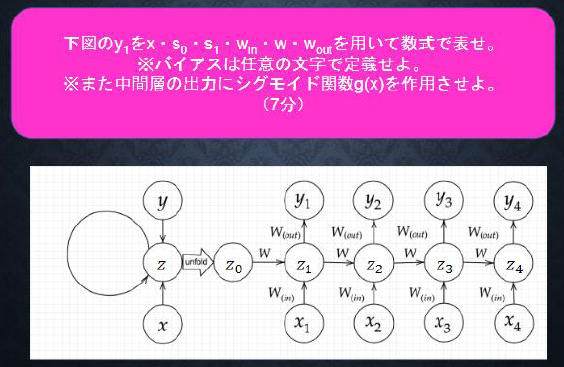

解答：

　$$y_1=g(W_（out）×S_1+c)$$

　$$S_1=g(W_(in)×WS_0+b)$$

実装演習

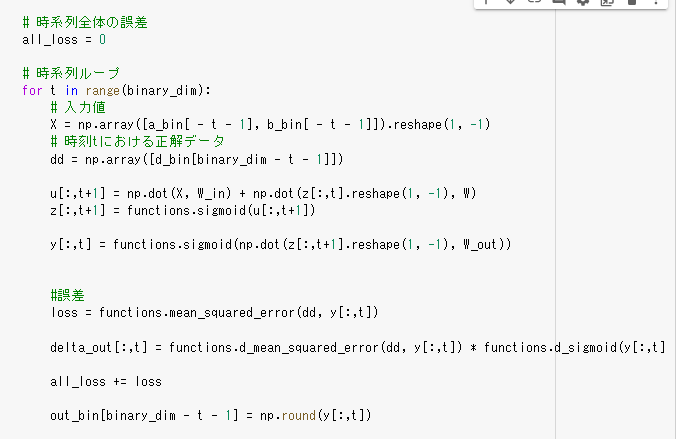

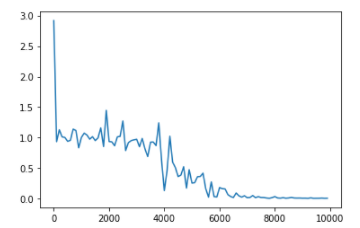

【考察】
RNNでは順伝播・逆伝播とも決められた回数計算する仕組み

過去の状況までさかのぼるということは、計算量が多いため、学習時間が長くなる可能性が考えられる

その結果、長期間にわたる学習は難しいと考えられる


# ２.ＬＳＴＭ

ＲＮＮは時系列をさかのぼればさかのぼれるほど、勾配が消失していくため、

長い時系列の学習が困難なため、構造を自体を変更したのがＬＳＴＭである。

・勾配消失問題は、シグモイド関数を使うと良く起きる

理由はシグモイド関数は0～１の間を緩やかに変化する関数のため

誤差逆伝播法が進むと勾配が緩やかになり、下位の勾配がほとんど変わらなくなってしまうため

最適値となることができなくなってしまう


・勾配爆発とは、消失とは逆に逆伝播するごとに関数が大きくなってしまうことで起きる

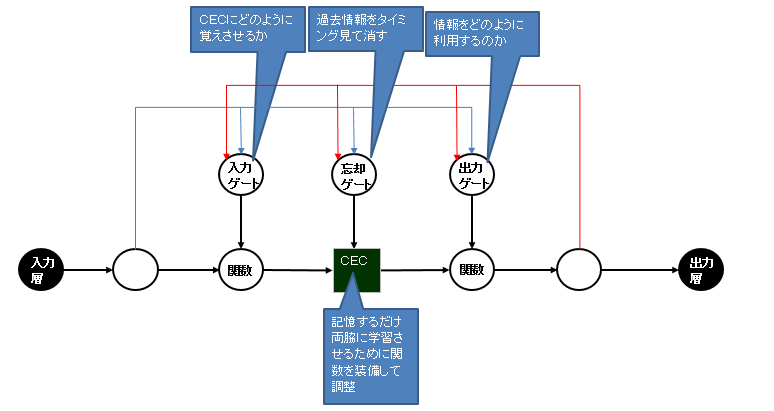

覗き穴結合　　(入力ゲート・出力ゲートからＣＥＣ)

→ＣＥＣ自身の値に、重み行列を介して伝播可能にした

現在のＣＥＣ状況をみて関数を調整できるようにした

【確認テスト】

（１）以下の文章をＬＳＴＭに入力し空欄に当てはまる単語を予測したいとする。

「映画おもしろかったね。ところでとてもおなかが空いたからなにか＿＿＿＿。」

文中の「とても」という言葉は空欄の予測においてなくなっても影響ない。

この場合、どのゲートが作用するのか

解答：忘却ゲート

# ３．GRU

ＬＳＴＭはパラメータ数が多く、計算負荷が高くなる問題を解決するためにＧＲＵの構造を作成することとなった




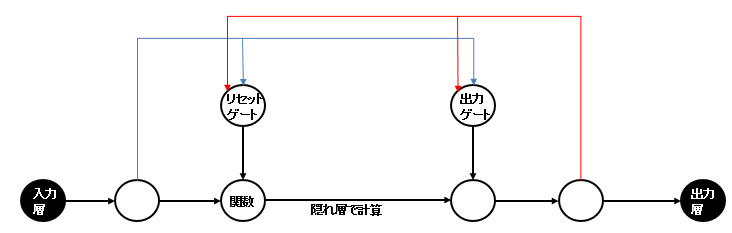



【確認テスト】

（１）ＬＳＴＭとＣＥＣが抱える課題はなにか

解答：

ＬＳＴＭはパラメータの数が多く複雑となり、計算量が多いこと

ＣＭＣは暗記することしかできないため、自分自身で学習する能力がないこと

（２）ＬＳＴＭとＧＲＵの違いは？

解答：ＬＳＴＭよりＧＲＵの方がパラメータが簡略化されているため、計算量が少ない



【実装】

①iters_numを100にしよう

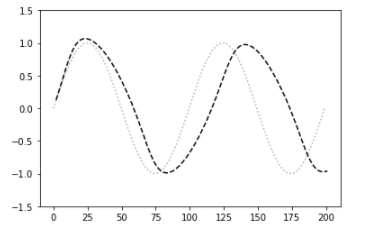



②maxlenを5, iters_numを500

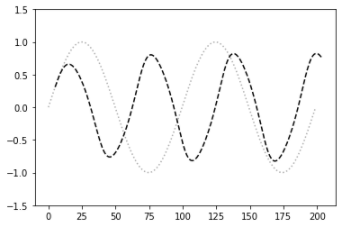



③maxlenを5, iters_numを3000

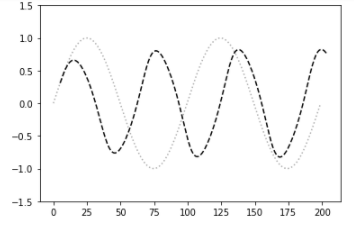

# ４．双方向RNN

過去の情報だけでなく未来の情報を加味することで、精度を向上させるためのモデル

実用例：文章の推敲、機械翻訳

# ５．Seq2seq

Encoder-Decoderモデルの一種



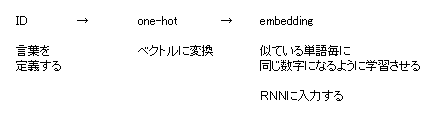

Encoderは、ID　→ one-hot →　embedding

Decoderは、embedding　→ one-hot　→　ID

上記により文脈を予測する　 　

◆HRED

Seq2seqは、一問一答しかできないため、文脈等を考えることができない。

文脈を考慮できるように、過去のn-1個の発話から生成するように行い、

より人間らしい文章を生成する手法。

しかし、会話の流れのような多様性がなく、短く返答を行ってしまいがちである。


◆VHRED

HREDに、VEAの潜在変数の概念を追加したもの

　★VAEとは…

　　オートエンコーダーを用いてデータを圧縮したデータを、潜在変数Ｚに確立分布Ｚ～Ｎ（0，1）を仮定したもの

【確認テスト】

（１）下記の説明文から、seq2seqについて説明している番号を選べ

①時刻に関して順方向と逆方向のＲＮＮを構成し、それら２つの中間層表現を特徴量として利用するものである

②ＲＮＮを用いたEncoder-Decoderモデルの一種であり、機械翻訳などのモデルに使われる

③構文木などの木構造に対して、隣接単語から表現ベクトル(フレーズ)を作るという演算を再帰的に行い（重みは共通）、

　文全体の表現ベクトルを得るニューラルネットワークである

④ＲＮＮの一種であり、単純なＲＮＮにおいて問題となる勾配消失問題をＣＥＣとゲートの概念を導入することで解決したものである


解答：２

（２）ＶＡＥに関する下記の説明文中の空欄に当てはまる言葉を答えよ。

　自己符号化器の潜在変数に＿＿＿＿を導入したもの

解答：確立分布

# ６．Word2Vec

ＲＮＮでは単語のような可変長の文字をＮＮに与えることができない　→固定長形式で単語を表す必要がある

ボキャブラリー　×　単語　の行列を作成することで、大規模データの分散表現の学習を可能とした


# ７．Attention Mechanism

文章が長くなるほどそのシーケンスの内部表現の次元が大きくなってくるため、その仕組みが必要となる。

→入力と出力のどの単語が関連しているのかの関連度を学習する仕組みである。

【確認テスト】

ＲＮＮとword2vec、seq2seqとAttentionの違いを述べよ

解答：

ＲＮＮは時系列を処理するのに適したネットワーク

word2vecは単語の分散ベクトルをえる手法

seq2seqは、一つの時系列から別の時系列データを得る方法

Attentionは、時系列データの中身にそれぞれの関連性について重みを付ける


# **深層学習**　**４日目**

# １．強化学習

行動の結果として与えられる利益（報酬）をもとに、行動を決定する原理を改善していく仕組み

最初は、あてずっぽうにランダムで進めていき、ある程度情報が得られたらその中からよりベターとなる方向性・方策を探っていく

教師あり・教師なし学習との違いは、データパターンの特徴量を探し出すものに対し、優れた方策を探しだすことが違いである。

方策関数　…　どういう風に頑張るのか

行動価値関数　…　どういう条件が一番いいのんか

上記を用いて、方策関数で行動を決定し、その行動結果を観測して結果としてどのくらい価値があったのか行動価値関数を用いて算出する


# ２．Aplha Go

囲碁の手を、探し出すＡＩ。

まずは、人間が囲碁を打つ手を覚えさせる

その後、PolicyNetとPolicyPoolからランダムに選択されたPolicyNetと対局シュミレーションを行い、

その結果を用いて方策勾配法で学習を行う。



◆AlphaGo Zero

強化学習のみで作成している。特徴量からヒューリスティックな要素を排除し、石の配置のみにした。

PolicyNet と ValueNet を一つのネットワークに統合し、Residual Net を導入した。

モンテカルロ木探索からRollOutシミュレーションをなくした

# ３．軽量化・高速化技術

軽量化

◆分散深層学習

深層学習には多くのデータを使用しパラメータ調整のため多くの時間を要するため、

データの並列化、モデルの並列化等の高速技術を用いて分散させながら学習を行う

　・データ並列化

　　　→親モデルを各ワーカーに子モデルとしてコピー　

　　　　データを分割し、各ワーカーごとに計算させる


　　　●同期型

　　　　各ワーカーが計算が完了するのを待ち、全てのワーカーの勾配が出たところで勾配の平均を計算し、

　　　　親モデルのパラメーターを更新する


　　　●非同期型

　　　　各ワーカーはお互いの計算を待たず、各子モデルごとに更新を行う。

　　　　学習が終わった子モデルはパラメータサーバーにPushされる　

　　　　→新たに学習を始めるときは、パラメータサーバーからPopしたモデルに対して学習していく

　・モデル並列化

　　親モデルを各ワーカーに分割し、それぞれのモデルを学習させる

　　すべてのデータで学習が終わった後で、一つのモデルに復元

モデルの軽量化

モデルの精度を維持しつつパラメータや演算回数を低減する手法の総称


　　・量子化

　　　通常のパラメータの64bit浮動小数点を32bitなど下位の精度に落としメモリで演算処理の削減を行う

　　・蒸留

　　　学習済みの精度の高いモデルの知識を軽量なモデルへ継承させる

　　　教師モデル（学習済み）と生徒モデル　→　教師モデルに近づけるように生徒モデルを学習させる

　　　・プルーニング

　　　モデルの精度に寄与が少ないニューロンを削減すること　（役に立ってないパラメータをけす！）

　　　→計算量を少なくして、処理の高速化を目指す

# ４．応用技術

■MobileNet（画像）

一般的な畳み込みレイヤー

　・入力特徴マップ（チャネル数）：Ｈ×Ｗ×Ｃ

　・畳込みカーネルのサイズ：Ｋ×Ｋ×Ｃ

　・出力チャネル（チャネル数）：Ｍ

　・ストライド１でパディングを適用した場合の畳み込み計算の計算量：Ｈ×Ｗ×Ｋ×Ｋ×Ｃ×Ｍ

→　一般的な畳み込みレイヤーは計算量が多いため、以下のものを組合せ計算量をへらしたもの

★Depthwise Convolution

　　→フィルタ数を１つと考えて
　　
　　Ｈ×Ｗ×Ｋ×Ｋ×Ｃ×１→Ｈ×Ｗ×Ｋ×Ｋ×Ｃ

★Pointwise Convolution

　　→カーネルを１つと考えて

　　Ｈ×Ｗ×１×１×Ｃ×Ｍ→Ｈ×Ｗ×Ｃ×Ｍ

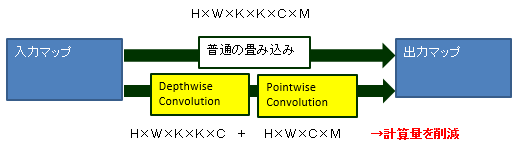

■DenseNet（画像）

①出力層に前の層の入力を足し合わせる（特徴マップ作成）

②Batch正規化

③Relu関数による変換

④３×３畳み込み層による処理

■Wavenet（音声生成）

時系列データに対して畳み込みを適用する


★Dilated convolution

層が深くなるにつれて畳み込むリンクを離す

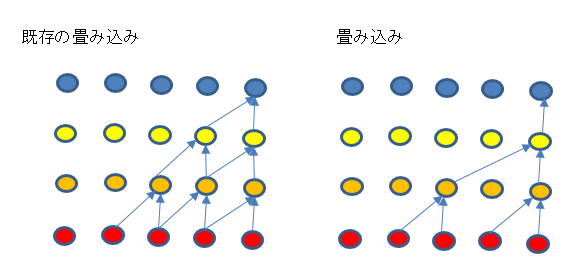

【確認テスト】

深層学習を用いて結合確立を学習する際に、効率的に学習が行える

アーキテクチャを提案したことがWaveNetの大きな貢献の一つである

提案された新しいConvolution型アーキテクチャは（あ）と呼ばれ

結合確立を効率的に学習できるようになっている

（あ）を用いて際の大きな利点は、単純なConvolution layerと比べて

（い）ことである。

解答

（あ）Dilated causal convolution

（い）パラメータ数に対する受容野が広い


# ５．Transformer


計算量が少ないわりに、表現力が豊かなモデル

→文脈が長くなっても対応できるように、言語構造をとらえるように作成されていることが多い


■Attention

→情報が多くなってきたときに、何に注意して何を注意しないか学習できるように決めていく
　

└①ソース・ターゲット注意機構

└②自己注意機構

　　　　→自分の入力でどこに注意すべきかきめてしまう

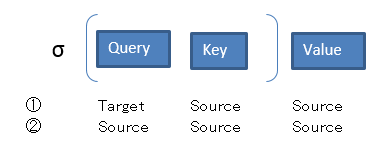

■モデル

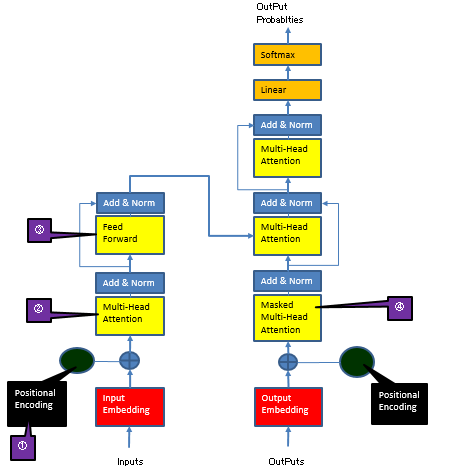

①単語のベクトルに単語の位置情報を追加

②複数のヘッドで行う

③単語の位置毎に独立処理する全結合

④未来の単語を見えないようマスク

・Add

入出力の差分を学習させる、実装は出力に入力をそのまま加算する

効果：学習・テストエラーの低減

・Norm

各層においてバイアスを除く活性化関数への入力を平均0、分散1に正則化

効果：学習の高速化

# ６．物体検知・セグメンテーション

画像認識をどのように認識させるのか

目的に応じて学習を行うためデータセットから、画像を認識させる

【分類問題の指標】

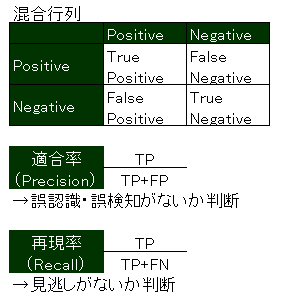

■Iou：Interseciton  over  Union

物体検出においてはクラスラベルだけではなく、物体位置の予測精度も評価したい

$$ IoU =\frac{TP}{TP+FP+FN} $$

→値の直観的解釈が難しい


■AP：Average Precison

$$AP =   ∫^1_0P(R)dR  $$


※各Recallのレベルに対して最大のPrecisionを計算

　クラス毎に計算される

■mAp：mean Average Precision

APの平均を求める方法

$$
    mAP = \frac{1}{C}\sum_{i=1}^{c}AP_i \quad
$$

■物体の検知

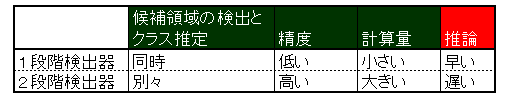

■Semantic Segmentation

ある一部分だけで判断できないことがあるため、正しく認識するために受容野に大きさが必要であった

→受容野を広げるための工夫

①深いConvolution層

②プーリング

プーリングをすることではっきりとした情報（輪郭）がなくなっていくので、Unpooingすることで補完する